In [1]:
import numpy as np
import pandas as pd
from utils import get_data, get_preds, get_table, plot_rsme, plot_interval_check, plot_interval_sizes
np.random.seed(2024)
train, test = get_data(filepath="processed_data/full_data_secs.csv", size_train=1000, size_test=1000, train_tup=(2021, 2023))
train.to_csv("processed_data/train.csv")
test.to_csv("processed_data/test.csv")
# test = pd.read_csv("processed_data/test.csv")
# plt.plot([10, 100, 256, 512, 1000], [53, 88, 201, 392, 853])

#(22-23, 21-23, 15-20, 10-23)

In [2]:
model_info = {
    "no_curr_pace": ("stan_results/params1.csv", ['total_pace', 'prop'], ['beta.1', 'beta.2'], True),
    "curr_pace": ("stan_results/params2.csv", ['total_pace', 'curr_pace', 'prop'], ['beta.1', 'beta.2', 'beta.3'], True),
    "rstan2d" : ("stan_results/rs_result2d.csv", ["total_pace", "curr_pace", "prop"], ["beta[1]", "beta[2]", "beta[3]"], True),
}
models = {k: pd.read_csv(v[0]) for k, v in model_info.items()}

In [3]:
model_preds = {}

for k, v in model_info.items():
    print(k, v)
    preds = get_preds(test, pd.read_csv(v[0]), feats_lis=v[1], beta_lis=v[2], propleft=v[3])
    model_preds[k] = preds

no_curr_pace ('stan_results/params1.csv', ['total_pace', 'prop'], ['beta.1', 'beta.2'], True)
curr_pace ('stan_results/params2.csv', ['total_pace', 'curr_pace', 'prop'], ['beta.1', 'beta.2', 'beta.3'], True)
rstan2d ('stan_results/rs_result2d.csv', ['total_pace', 'curr_pace', 'prop'], ['beta[1]', 'beta[2]', 'beta[3]'], True)


In [4]:
# s_data =pd.DataFrame([[4, 0.2, .5], [3, 0.5, .75]], columns=["total_pace", "prop", "propleft"])
# get_preds(s_data, models['rstan2c'], feats_lis = ["total_pace", "prop"], beta_lis = ["beta[1]", "beta[2]"], full=True)

In [5]:
test2 = test.copy()
for k, v in model_preds.items():
    test2[k] = get_table(v)["stan"]
test2["extrap"] = get_table(model_preds["rstan2d"])["extrap"]
# test2["t1"] = (42195/60)/ pd.read_csv("stan_results/result1.csv", index_col="Unnamed: 0")['x'].values - (42195/60)/test["finish"]
# test2["t2"] = (42195/60)/ pd.read_csv("stan_results/result2.csv", index_col="Unnamed: 0")['x'].values - (42195/60)/test["finish"]
test2

,id,dist,curr_pace,total_pace,finish,age,gender,year,prop,propleft,male,propxcurr,malexage,no_curr_pace,rstan2d,extrap
28,286805,5K,3.342777,5.154639,5.018435,31,M,2023,0.118497,0.881503,1,0.610812,31,3.303172,3.345261,-3.702833
29,286806,5K,-10.724699,5.681818,5.011283,38,M,2023,0.118497,0.881503,1,0.673281,38,-10.791484,-10.722722,-16.561333
71,286848,5K,13.901554,4.677268,4.851115,29,F,2023,0.118497,0.881503,0,0.554244,0,13.899908,13.904668,5.388183
85,286862,5K,5.087218,4.897160,4.806904,30,M,2023,0.118497,0.881503,1,0.580301,30,5.066098,5.090017,-2.696350
120,286897,5K,-4.406993,5.117707,4.720855,41,M,2023,0.118497,0.881503,1,0.606435,41,-4.444194,-4.404467,-11.551617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208126,312707,40K,1.921738,1.960977,1.956008,27,F,2023,0.947980,0.052020,0,1.546459,0,0.510056,1.919472,-0.910996
208138,312719,40K,-1.480089,1.967439,1.951665,56,F,2023,0.947980,0.052020,0,1.638402,0,-1.474314,-1.481255,-2.888940
208148,312729,40K,-1.123718,1.959728,1.943664,60,M,2023,0.947980,0.052020,1,1.605113,60,-1.543473,-1.125218,-2.965773
208150,312731,40K,1.308243,1.968310,1.942322,64,M,2023,0.947980,0.052020,1,1.356971,64,-3.366740,1.303431,-4.780504


In [6]:
# import seaborn as sns
# marks = ["5K", "10K", "15K", "20K", "25K", "30K", "35K", "40K"]
# for mark in marks:
#     sns.kdeplot(test2[test2["dist"] == mark]["rstan2d"], label=mark)
# plt.xlim(-20, 20)
# plt.legend()
# plt.show()
# for m in model_info.keys():
#     sns.kdeplot(test2[m], label=m)

# plt.xlim(-20, 20)
# plt.legend()

,no_curr_pace,curr_pace,extrap
dist,,,
5K,17.186473,17.015182,17.949925
10K,13.516352,13.225022,17.030332
15K,11.269320,10.974633,15.659996
20K,9.260069,8.920168,13.330850
25K,7.618082,7.242117,11.200824
30K,5.754797,5.243184,7.903727
35K,3.783593,3.278807,4.350297
40K,1.134416,0.994469,1.172183


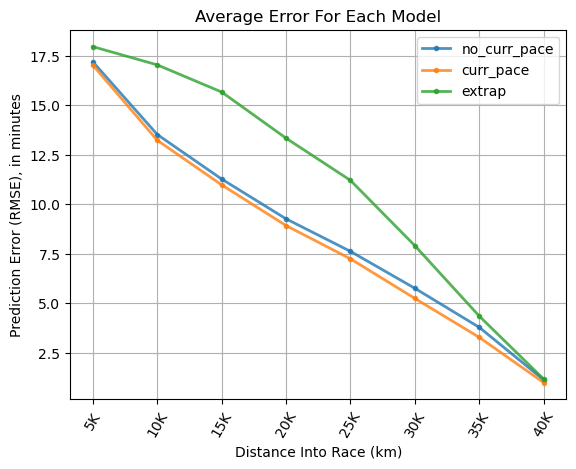

In [7]:
labels = ["no_curr_pace", "curr_pace", "extrap"]
table_group = plot_rsme(test2, labels, "all_errors")
table_group

In [8]:
test2[labels].apply(lambda x: (x ** 2).mean() ** 0.5)#.loc[mks]

no_curr_pace     9.984791
curr_pace        9.721808
extrap          12.466984
dtype: float64

In [9]:
# test2.groupby(["dist"])[labels].apply(lambda x: (x ** 2).sum()).loc[mks]
# 1 - (((test2[labels]) ** 2).sum()/((((42195/60) / test2["finish"]) - ((42195/60) / test2["finish"]).mean()) ** 2).sum()) # r squared

In [17]:
1 - (table_group["no_curr_pace"] / table_group["extrap"]), 1 - (table_group["curr_pace"] / table_group["extrap"])

(dist
 5K     0.042532
 10K    0.206337
 15K    0.280375
 20K    0.305365
 25K    0.319864
 30K    0.271888
 35K    0.130268
 40K    0.032219
 dtype: float64,
 dist
 5K     0.052075
 10K    0.223443
 15K    0.299193
 20K    0.330863
 25K    0.353430
 30K    0.336619
 35K    0.246303
 40K    0.151610
 dtype: float64)

In [11]:
model_preds2 = {}

for k, v in model_info.items():
    print(k, v)
    preds = (42195 / 60) / get_preds(test, pd.read_csv(v[0]), feats_lis=v[1], beta_lis=v[2], propleft=v[3], full=True)
    model_preds2[k] = preds

no_curr_pace ('stan_results/params1.csv', ['total_pace', 'prop'], ['beta.1', 'beta.2'], True)
curr_pace ('stan_results/params2.csv', ['total_pace', 'curr_pace', 'prop'], ['beta.1', 'beta.2', 'beta.3'], True)
rstan2d ('stan_results/rs_result2d.csv', ['total_pace', 'curr_pace', 'prop'], ['beta[1]', 'beta[2]', 'beta[3]'], True)


In [12]:
# model_preds2["new1"] = (42195 / 60) / get_preds(test, pd.read_csv("stan_results/params1.csv"), feats_lis=['total_pace', 'curr_pace', 'prop'], beta_lis=['beta.1', 'beta.2', 'beta.3'], propleft=True, full=True)

In [13]:
def add_intervals_to_test(data_tbl, pred_names):
    data = data_tbl.copy()
    for pred_name in pred_names:
        for conf, lower, upper in [(50, 25, 75), (80, 10, 90), (95, 2.5, 97.5)]:
            test_true = (42195 / 60) / data["finish"]
            b1, b2 = np.percentile(model_preds2[pred_name], [lower, upper], axis=1)
            data[f"{pred_name}-lower{conf}"] = b1
            data[f"{pred_name}-upper{conf}"] = b2
            data[f"{pred_name}-size{conf}"] = b2 - b1
            data[f"{pred_name}-in{conf}"] = (test_true < b2) & (test_true > b1)
    return data

pred_names = labels[:2]#["rstan3a", "rstan3b", "rstan2c", "rstan2d", "new1"]
intervals_tbl = add_intervals_to_test(test2, pred_names)
intervals_tbl

,id,dist,curr_pace,total_pace,finish,age,gender,year,prop,propleft,...,curr_pace-size50,curr_pace-in50,curr_pace-lower80,curr_pace-upper80,curr_pace-size80,curr_pace-in80,curr_pace-lower95,curr_pace-upper95,curr_pace-size95,curr_pace-in95
28,286805,5K,3.342777,5.154639,5.018435,31,M,2023,0.118497,0.881503,...,9.473994,True,135.155388,152.858544,17.703156,True,131.048600,158.598035,27.549434,True
29,286806,5K,-10.724699,5.681818,5.011283,38,M,2023,0.118497,0.881503,...,7.638359,False,122.906768,137.286305,14.379537,False,119.620588,142.041294,22.420706,True
71,286848,5K,13.901554,4.677268,4.851115,29,F,2023,0.118497,0.881503,...,11.206981,False,148.726839,170.509491,21.782651,False,143.981597,177.668712,33.687115,True
85,286862,5K,5.087218,4.897160,4.806904,30,M,2023,0.118497,0.881503,...,10.470874,False,142.148067,162.018521,19.870454,True,137.521947,168.633000,31.111053,True
120,286897,5K,-4.406993,5.117707,4.720855,41,M,2023,0.118497,0.881503,...,9.558675,True,136.022211,154.272123,18.249912,True,131.760734,159.568796,27.808061,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208126,312707,40K,1.921738,1.960977,1.956008,27,F,2023,0.947980,0.052020,...,3.450173,False,358.197122,364.819051,6.621930,True,356.411588,366.710028,10.298440,True
208138,312719,40K,-1.480089,1.967439,1.951665,56,F,2023,0.947980,0.052020,...,3.451209,True,355.550795,362.195729,6.644934,True,354.004702,363.966482,9.961780,True
208148,312729,40K,-1.123718,1.959728,1.943664,60,M,2023,0.947980,0.052020,...,3.564669,True,357.225290,363.947497,6.722206,True,355.622301,365.796389,10.174088,True
208150,312731,40K,1.308243,1.968310,1.942322,64,M,2023,0.947980,0.052020,...,3.591236,True,360.016902,366.855616,6.838714,True,358.464912,369.052610,10.587698,True


,no_curr_pace-in50,curr_pace-in50,no_curr_pace-in80,curr_pace-in80,no_curr_pace-in95,curr_pace-in95
dist,,,,,,
5K,0.482,0.443,0.901,0.852,0.992,0.980
10K,0.571,0.528,0.937,0.906,0.995,0.991
15K,0.597,0.568,0.945,0.920,0.988,0.983
20K,0.594,0.571,0.928,0.914,0.987,0.979
25K,0.620,0.613,0.911,0.901,0.974,0.970
30K,0.573,0.568,0.891,0.893,0.972,0.972
35K,0.484,0.511,0.854,0.906,0.970,0.976
40K,0.500,0.724,0.837,0.922,0.966,0.978


<Figure size 4000x4000 with 0 Axes>

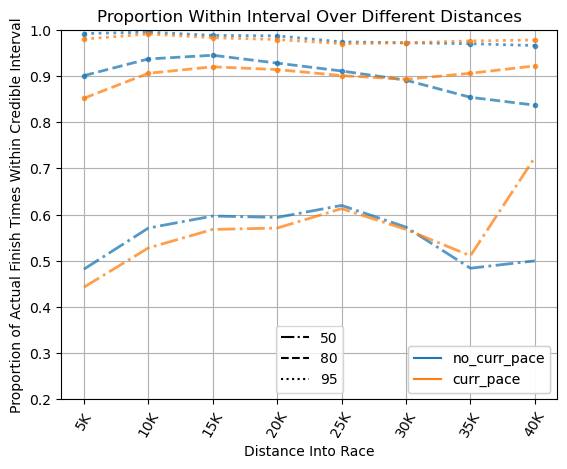

In [14]:
plot_interval_check(intervals_tbl, pred_names)

,no_curr_pace-size50,curr_pace-size50,no_curr_pace-size80,curr_pace-size80,no_curr_pace-size95,curr_pace-size95
dist,,,,,,
5K,27.898337,25.166468,53.495206,48.243604,83.417039,74.970690
10K,23.308884,20.999518,44.621771,40.162688,69.178732,62.159601
15K,19.293436,17.411842,36.821991,33.212234,56.839633,51.165662
20K,15.566859,14.094209,29.693286,26.841881,45.719605,41.228202
25K,11.953071,10.783840,22.756943,20.544972,34.898215,31.495940
30K,8.483597,7.701702,16.144850,14.650454,24.724924,22.430299
35K,5.026576,4.572599,9.564322,8.685349,14.642787,13.288544
40K,1.528495,1.381604,2.902463,2.625189,4.437288,4.012189


<Figure size 3000x2000 with 0 Axes>

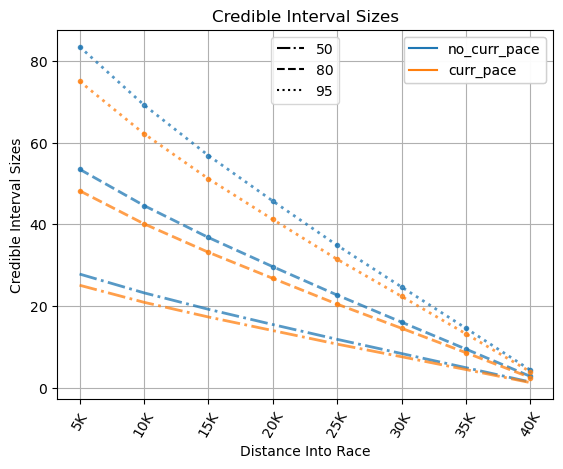

In [15]:
plot_interval_sizes(intervals_tbl, pred_names)